In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from collections import deque
from functools import lru_cache
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Arthur Henrique Silva Carvalho
## Matrícula: 211026673

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [2]:
def decimate_by_2(signal: np.ndarray) -> np.ndarray:
    length = len(signal)
    decimated = np.zeros(length // 2 + int(length % 2 != 0))
    idx = 0
    for i in range(0, len(signal), 2):
        decimated[idx] = signal[i]
        idx += 1
    return decimated


s = np.array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0])
print('Sinal =', s)
s = decimate_by_2(signal=s)
print('1-a) Decimado =', *s, sep=', ')

Sinal = [1 2 1 0 1 2 1 0 1 2 1 0 1 2 1 0 1 2 1 0]
1-a) Decimado =, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [3]:
def interpolate_by_2(signal: np.ndarray) -> np.ndarray:
    length = len(signal)
    interpolated = np.zeros(length * 2)
    idx = 0
    for i in range(length * 2 - 1):
        if i % 2 == 0:
            interpolated[i] = float(signal[idx])
            idx += 1
        else:
            interpolated[i] = (signal[idx] + signal[idx - 1]) / 2
    interpolated[-1] = signal[-1] / 2
    return interpolated


s = interpolate_by_2(signal=s)
print('1-b) Interpolado =', *s, sep=', ')
print('')

1-b) Interpolado =, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5



## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

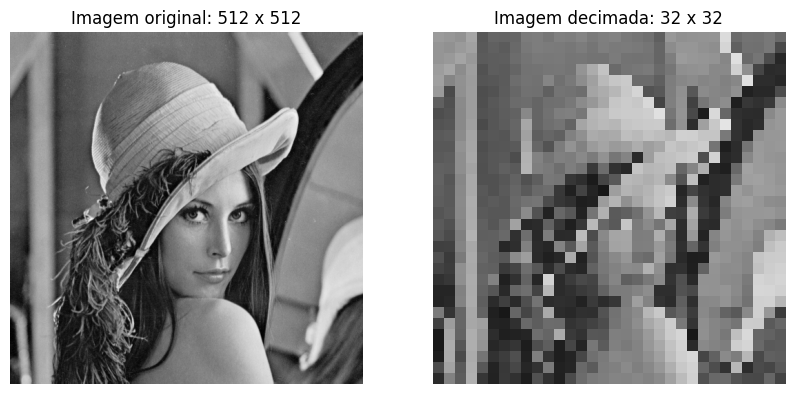

In [4]:
def iterate_decimation(arr: np.ndarray) -> np.ndarray:
    h, w = arr.shape
    for _ in range(4):
        new_arr = np.zeros((h, w // 2))
        for i in range(len(arr)):
            new_arr[i] = decimate_by_2(arr[i])
        arr = new_arr
        h, w = arr.shape
    return arr


im = Image.open('lena.bmp')
arr = np.array(im)
h, w = arr.shape
ax = plt.subplots(1,2, figsize=(10, 5))[1]
ax[0].imshow(im, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f'Imagem original: {h} x {w}')
arr = iterate_decimation(arr=arr.T)
arr = iterate_decimation(arr=arr.T)
h, w = arr.shape
im = Image.fromarray(arr)
ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'Imagem decimada: {h} x {w}')
plt.show()


## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

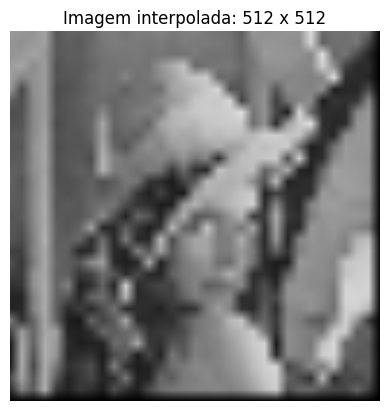

In [5]:
def iterate_interpolation(arr: np.ndarray) -> np.ndarray:
    h, w = arr.shape
    for _ in range(4):
        new_arr = np.zeros((h, w * 2))
        for i in range(len(arr)):
            new_arr[i] = interpolate_by_2(arr[i])
        arr = new_arr
        h, w = arr.shape
    return arr


arr = iterate_interpolation(arr=arr.T)
arr = iterate_interpolation(arr=arr.T)
h, w = arr.shape
im = Image.fromarray(arr)
ax = plt.subplots(1,1)[1]
ax.imshow(im)
ax.set_title(f'Imagem interpolada: {h} x {w}')
ax.axis('off')
plt.show()

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

Podemos reescrever o sistema como:

$(E^2 + \frac{1}{6})y[n] = (E^2 + 2E + 1)x[n]$

E obteremos a equação característica:

$\gamma^2 + \frac{1}{6} = 0$

Encontrar os modos característicos:

$\Delta = 0^2 - 4(1)(\frac{1}{6}) = -\frac{2}{3}$

$\gamma = \frac{\pm j\sqrt{\frac{2}{3}}}{2} = \pm j\sqrt{\frac{2}{3}} \cdot \sqrt{\frac{1}{4}} = \pm j\sqrt{\frac{1}{6}}$

$|\gamma| = \sqrt{\frac{1}{6}}$

A solução natural é dada por:

$y_c[n] = C \Big(\sqrt{\frac{1}{6}}\Big)^n \cos(\frac{\pi}{2}n + \theta)$

Determinaremos, portanto, a resposta ao impulso:

$h[n] = \frac{b_n}{a_n}\delta[n] + y_c[n]$

$h[n] = 6\delta[n] + C \Big(\sqrt{\frac{1}{6}}\Big)^n \cos(\frac{\pi}{2}n + \theta)$

Para encontrar as constantes do sistema, podemos montar o sistema de equações substituindo $y[-1] $ e $y[-2]$:

$h[0] = -\frac{1}{6}h[-2] + \delta[0] + 2\delta[-1] + \delta[-2] = 1$

$h[1] = -\frac{1}{6}h[-1] + \delta[1] + 2\delta[0] + \delta[-1] = 2$

Assim, podemos determinar as constantes $C$ e $\theta$ substituindo $h[-1]$ e $h[-2]$:

$6 + C\cos(\theta) = 1$

$C \sqrt{\frac{1}{6}} \cos(\frac{\pi}{2} + \theta) = 2$

Solucionando-se o sistema, obtemos $C \approx -7$ e $\theta \approx 0.7753$ rad. Finalmente, a resposta ao impulso será descrita por:

$h[n] = 6\delta[n] - 7\Big(\sqrt{\frac{1}{6}}\Big)^n \cos(\frac{\pi}{2}n + 0.7753)$, $n \geq 0$.





## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

MSE = 3.261474194116763e-09


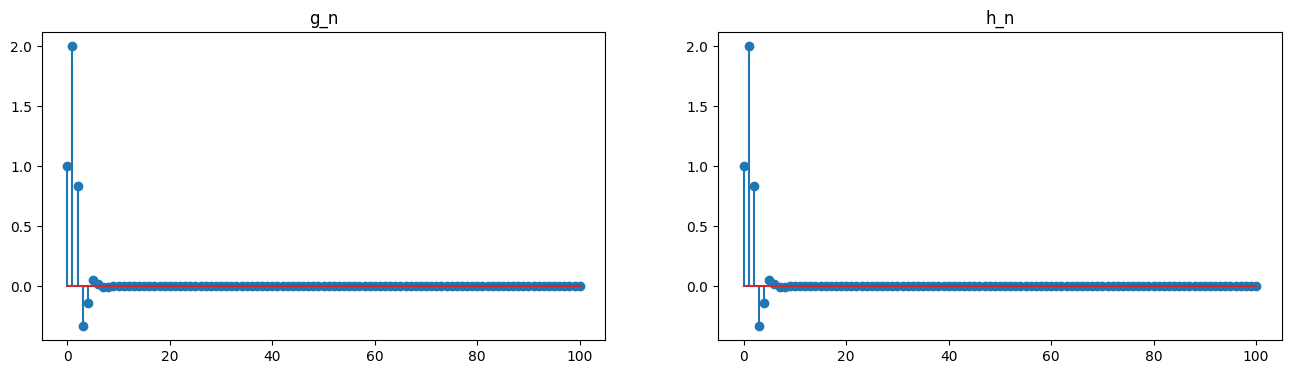

In [18]:
def delta(n: int) -> int: # Corresponde ao Delta de Dirac
    return int(n == 0)


def g(n: int) -> float: # Corresponde à resposta ao impulso calculada analiticamente
    return 6 * delta(n) - 7 * ((1/6)**0.5)**n * np.cos(np.pi/2 * n + 0.7753)


@lru_cache(maxsize=102)
def h(n: int) -> float: # Corresponde à resposta ao impulso calculada iterativamente
    if  n < 0:
        return 0
    return (-1/6)*h(n-2) + delta(n) + 2*delta(n-1) + delta(n-2)


def calculate_mse(h: list, g: list) -> float: # Calcula o erro médio quadrático entre h[n] e g[n]
    result = 0
    for i in range(len(h)):
        result += (h[i] - g[i]) ** 2
    result /= len(h)
    return result


n = [i for i in range(101)]
h_n = [h(i) for i in n]
g_n = [g(i) for i in n]
print('MSE =', calculate_mse(h_n, g_n))
ax = plt.subplots(1, 2, figsize=(16, 4))[1]
ax[0].stem(n, g_n)
ax[0].set_title('g_n')
ax[1].stem(n, h_n)
ax[1].set_title('h_n')
plt.show()

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

Podemos determinar a função de transferência como:

$H(z) = \frac{z^2 + 2z + 1}{z^2 + \frac{1}{6}}$

Sua resposta forçada será:

$y_\phi[n] = H\Big(\frac{1}{4}\Big) \Big(\frac{1}{4}\Big)^n u[n] = 6.81 \Big(\frac{1}{4}\Big)^n u[n]$

E sua resposta natural, como anteriormente determinado, é dada por:

$y_c[n] = C \Big( \sqrt{\frac{1}{6}} \Big)^n \cos(\frac{\pi}{2}n + \theta)$

Para determinar a resposta completa, considerando que $y[n] = 0\ \forall \ n < 0$, podemos substituir $n = -2$ e $n = -1$:

$y[n+2] = -\frac{1}{6}y[n] + x[n+2] + 2x[n+1] + x[n]$

$y[0] = -\frac{1}{6}y[-2] + x[0] + 2x[-1] + x[-2] = 1$

$y[1] = -\frac{1}{6}y[-1] + x[1] + 2x[0] + x[-1] = 2.25$

Logo, obtemos o sistema:

$C \cos(\theta) = -5.81$

$C \Big(\sqrt{\frac{1}{6}} \cos(\frac{\pi}{2} + \theta) + 1.7025 = 2.25 \Big)$

E, ao se solucionar o sistema, obteremos $C \approx -5.96$ e $\theta \approx 0.226$ rad. Concluímos, portanto, que a resposta do sistema é dada por:

$y_\phi + y_c = 6.81 \Big(\frac{1}{4}\Big)^n - 5.96 \Big(\sqrt{\frac{1}{6}}\Big)^n \cos(\frac{\pi}{2} n + 0.226)$, $n \geq 0$.


### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

MSE = 0.07938115605738659


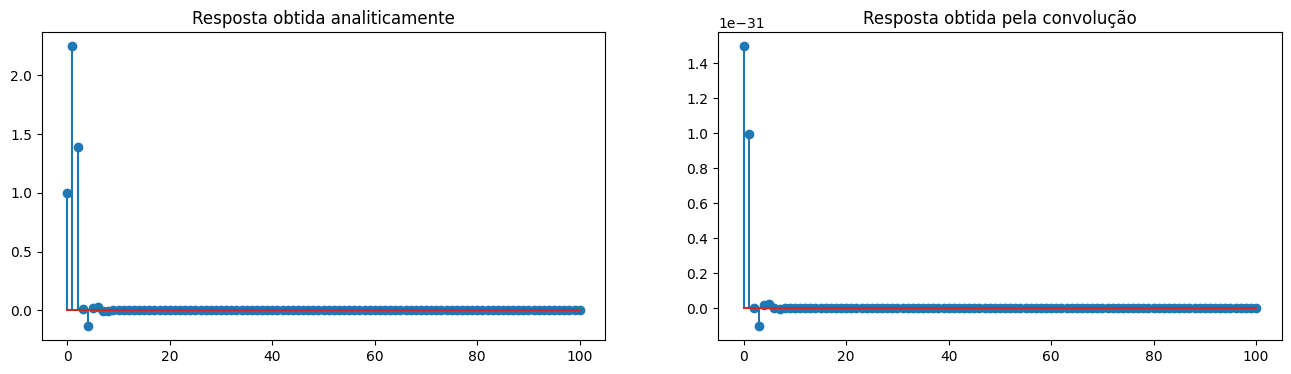

In [27]:
def x(n: int) -> int: # Retorna o valor de x[n]
    return (1/4)**n * int(n >= 0)


def analytical(n: int) -> float: # Resposta do sistema obtida analiticamente
    return 6.81 * ((1/4)**n) - 5.96 * ((1/6)**0.5)**n * np.cos(np.pi/2 * n + 0.226)


def convoluted(x: list, h: list) -> list: # Resposta do sistema através de convolução (apenas 100 primeiras amostras)
    y = [0 for _ in range(len(x))]
    h_deque = deque(h)
    while len(h_deque) < len(y):
        h_deque.appendleft(0)
    for i in range(len(y)):
        h_deque.rotate(1)
        y[i] += sum([h_deque[j] * x[j] for j in range(i, -1, -1)])
    return y


x_n = [x(i) for i in n]
y_n_analytical  = [analytical(i) for i in n]
h_n_reversed = h_n[::-1]
y_n_convolution = convoluted(x_n, h_n_reversed[:20])
print('MSE =', calculate_mse(y_n_analytical, y_n_convolution))
ax = plt.subplots(1, 2, figsize=(16, 4))[1]
ax[0].stem(n, y_n_analytical)
ax[0].set_title('Resposta obtida analiticamente')
ax[1].stem(n, y_n_convolution)
ax[1].set_title('Resposta obtida pela convolução')
plt.show()

## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

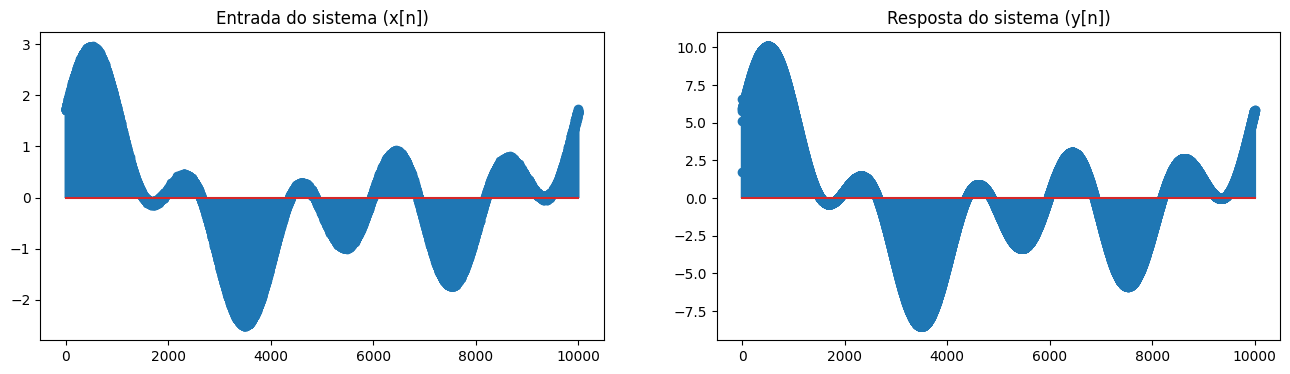

In [8]:
x_n = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()


def x(n: float) -> float:
    if n < 0:
        return 0
    return x_n[n]


@lru_cache(maxsize=len(x_n))
def y(n: int) -> int:
    if  n < 0:
        return 0
    return (-1/6)*y(n-2) + x(n) + 2*x(n-1) + x(n-2) 


n = list(range(len(x_n)))
y_n = [y(i) for i in range(len(x_n))]
ax = plt.subplots(1,2, figsize=(16,4))[1]
ax[0].stem(n, x_n)
ax[0].set_title('Entrada do sistema (x[n])')
ax[1].stem(n, y_n)
ax[1].set_title('Resposta do sistema (y[n])')
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

Podemos reescrever o sistema como:

$(E^2 - 2\cos(\frac{\pi}{8})E + 1)y[n] = (1)x[n]$

Com a seguinte equação característica:

$\gamma^{2} -2\cos(\frac{\pi}{8})\gamma + 1 = 0$

Obteremos os modos característicos:

$\Delta = (-2\cos(\frac{\pi}{8}))^{2} - 4 (1) (1) = 4 (\cos(\frac{\pi}{8})^2 - 1) = -4\sin(\frac{\pi}{8})^2$

$\gamma = \frac{2\cos(\frac{\pi}{8}) \pm  j2\sin(\frac{\pi}{8})}{2} = \cos(\frac{\pi}{8}) \pm  j\sin(\frac{\pi}{8}) = e^{\pm j\frac{\pi}{8}}$

E podemos obter a solução natural:

$y_c[n] = C \cos(\frac{\pi}{8} + \theta)$

Considerando $h[n] = 0 \ \forall \ n < 0$, podemos substituir $n = -1$ e $n = -2$ no sinal:

$h[n] = \delta[n] - h[n+2] + 2\cos(\frac{\pi}{8})h[n+1]$

$h[2] = $


## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

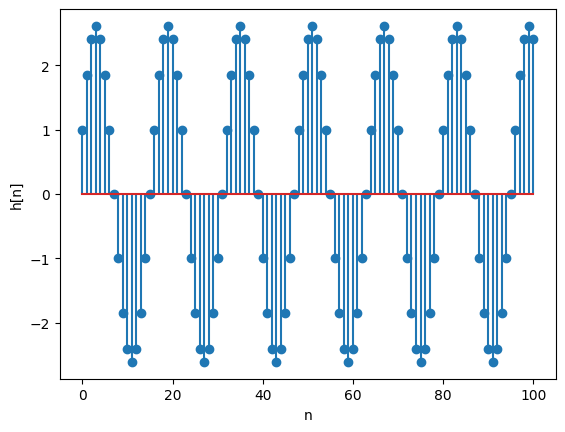

In [9]:
COS_CONSTANT = np.cos([np.pi/8])


def delta(n: int) -> int:
    return int(n == 0)


@lru_cache(maxsize=102)
def h(n: int) -> int:
    if n < 0:
        return 0
    return 2 * COS_CONSTANT * h(n-1) - h(n-2) + delta(n)


def calculate_mse(h: list, g: list) -> float:
    result = 0
    for i in range(len(h)):
        result += (h[i] - g[i]) ** 2
    result /= len(h)
    return result


n = [i for i in range(101)]
h_n = [h(i) for i in n]
plt.stem(n, h_n)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()